In [2]:
from wsi2TA import wsi2TA
import os
from natsort import natsorted
src = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\c2'
dst = os.path.join(src,'TA')
if not os.path.exists(dst): os.mkdir(dst)
imlist = natsorted([os.path.join(src,_) for _ in os.listdir(src) if _.lower().endswith(('ndpi','svs'))])

In [ ]:
[wsi2TA(_) for _ in imlist]

In [3]:
wsi2TA(imlist[14])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [1]:
from PIL import Image
Image.MAX_IMAGE_PIXELS=None
import os
from openslide import OpenSlide
import numpy as np
from skimage.morphology import closing, square, remove_small_objects, remove_small_holes
from skimage.segmentation import clear_border
from matplotlib import pyplot as plt

In [11]:
impth = imlist[14]
rsf = 128
im = OpenSlide(impth)
target = im.get_best_level_for_downsample(rsf)
imdim = im.level_dimensions[target]
imsmall = im.read_region(location=(0, 0), level=target, size=imdim)
bw = (150 < np.array(imsmall)[:, :, 0]) & (np.array(imsmall)[:, :, 1] < 210)
bw = closing(bw, square(3))

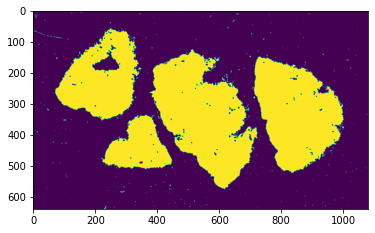

In [12]:
plt.imshow(bw)

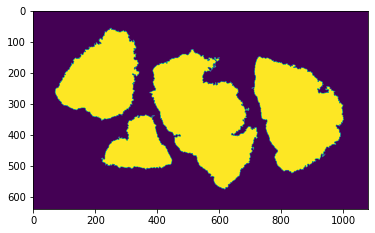

In [13]:
minTA = 8000
bw = remove_small_objects(bw, min_size=minTA, connectivity=2)
minTAhole = 4000
bw = remove_small_holes(bw, area_threshold=minTAhole)
bw = clear_border(bw)
plt.imshow(bw)